<a href="https://colab.research.google.com/github/vattikutiravi9/Kaggle/blob/master/Real%20or%20Not%3F%20NLP%20with%20Disaster%20Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import feature_extraction, linear_model, model_selection, preprocessing



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


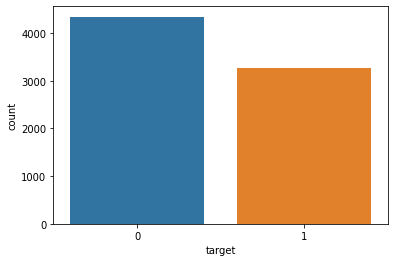

In [4]:
sns.countplot(train.target)

In [0]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [0]:
train_vectors = count_vectorizer.fit_transform(train["text"])
test_vectors = count_vectorizer.transform(test["text"])

In [7]:
test_vectors.shape[1]

21637

In [0]:
clf = linear_model.RidgeClassifier()

In [9]:
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=3, scoring="f1")
scores

array([0.59453669, 0.56498283, 0.64082434])

In [10]:
clf.fit(train_vectors, train["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [0]:
sample_submission = pd.read_csv("sample_submission.csv")

In [0]:
sample_submission["target"] = clf.predict(test_vectors)

In [13]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [0]:
sample_submission.to_csv('submission.csv', index=False)

#Text classification using LSTM 

In [15]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout, LSTM, Embedding, SpatialDropout1D,Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.


In [0]:
X =train.text
Y =train.target
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_test = tok.texts_to_sequences(test.text)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [0]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

epochs = 10
batch_size = 32




In [20]:
history = model.fit(sequences_matrix, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5823 samples, validate on 648 samples
Epoch 1/10
5823/5823 [==============================] - 46s 8ms/step - loss: 0.5736 - accuracy: 0.7053 - val_loss: 0.4835 - val_accuracy: 0.7809
Epoch 2/10
5823/5823 [==============================] - 46s 8ms/step - loss: 0.4050 - accuracy: 0.8255 - val_loss: 0.4502 - val_accuracy: 0.7948
Epoch 3/10
5823/5823 [==============================] - 47s 8ms/step - loss: 0.3501 - accuracy: 0.8552 - val_loss: 0.4588 - val_accuracy: 0.7978
Epoch 4/10
5823/5823 [==============================] - 46s 8ms/step - loss: 0.3504 - accuracy: 0.8741 - val_loss: 0.4626 - val_accuracy: 0.8025
Epoch 5/10
5823/5823 [==============================] - 45s 8ms/step - loss: 0.2935 - accuracy: 0.8846 - val_loss: 0.4702 - val_accuracy: 0.7978


In [0]:
pred = model.predict(sequences_matrix_test)

In [0]:
pred = (pred > 0.5).astype(int).reshape(pred.shape[0])

In [0]:
sample_submission["target"] = pred

In [24]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [0]:
sample_submission.to_csv('submission2.csv', index = False)

In [26]:
pip install bert-for-tf2

     |████████████████████████████████| 40kB 2.0MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=20eeced580c45c83d3f883fde1b5fd6fcab6c65a9fb31d7605679081c41ed7ce
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=6654f32cc3f9bca3a6230a55f37b01a657878cec20b3c3e928ab4e329ac9cb74
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=a22089a60024542c9d6d457a991b03975cff3ef4b9a9d5fa6853146fd8772d07
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [27]:
pip install sentencepiece

     |████████████████████████████████| 1.1MB 3.4MB/s 


In [0]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert
import re

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
text_train = []
sentences = list(train['text'])
for sen in sentences:
    text_train.append(preprocess_text(sen))

In [0]:
text_test = []
sentences = list(test['text'])
for sen in sentences:
    text_test.append(preprocess_text(sen))

In [33]:
print(text_train[100])

 NorwayMFA Bahrain police had previously died in road accident they were not killed by explosion https co gFJfgTodad


In [0]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [0]:
def tokenize_text(text_data):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_data))

In [0]:
tokenized_text_train = [tokenize_text(text) for text in text_train]
tokenized_text_test = [tokenize_text(text) for text in text_test]

In [0]:

Train_X = sequence.pad_sequences(tokenized_text_train,maxlen=max_len)

Test_X = sequence.pad_sequences(tokenized_text_test,maxlen=max_len)

In [0]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [0]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 2

In [0]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [0]:
 text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

In [42]:
text_model.fit(Train_X,train.target,batch_size=32, epochs=NB_EPOCHS)

Epoch 1/2
238/238 [==============================] - 53s 222ms/step - loss: 0.5209 - accuracy: 0.7355
Epoch 2/2
238/238 [==============================] - 54s 226ms/step - loss: 0.2737 - accuracy: 0.8965


In [0]:
pred = text_model.predict(Test_X)

In [0]:
pred = (pred > 0.5).astype(int).reshape(pred.shape[0])

In [0]:
sample_submission['target'] = pred

In [46]:
sample_submission.head(15)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [0]:
sample_submission.to_csv('submission3.csv', index=False)

In [48]:
test.text.head(10)

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
5                   We're shaking...It's an earthquake
6    They'd probably still show more life than Arse...
7                                    Hey! How are you?
8                                     What a nice hat?
9                                            Fuck off!
Name: text, dtype: object